# Deep Learning Just Works &trade;

So, let's train a significantly better model for image recongition.  We will use a Convolutional Neural Network (CNN) instead of a plain MLP.


First, load the data in a more appropriate format (do not flatten into vectors):

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten
from keras.optimizers import Adam
%matplotlib inline


# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)



/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Going Deeper with Convolutions

Define and train a simple CNN:


In [2]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 0.2003 - acc: 0.9405 - val_loss: 0.0699 - val_acc: 0.9772
Epoch 2/30
 - 4s - loss: 0.0440 - acc: 0.9864 - val_loss: 0.0326 - val_acc: 0.9887
Epoch 3/30
 - 4s - loss: 0.0305 - acc: 0.9903 - val_loss: 0.0304 - val_acc: 0.9899
Epoch 4/30
 - 4s - loss: 0.0213 - acc: 0.9934 - val_loss: 0.0298 - val_acc: 0.9901
Epoch 5/30
 - 4s - loss: 0.0166 - acc: 0.9951 - val_loss: 0.0244 - val_acc: 0.9917
Epoch 6/30
 - 4s - loss: 0.0128 - acc: 0.9962 - val_loss: 0.0266 - val_acc: 0.9917
Epoch 7/30
 - 4s - loss: 0.0105 - acc: 0.9965 - val_loss: 0.0212 - val_acc: 0.9934
Epoch 8/30
 - 4s - loss: 0.0089 - acc: 0.9971 - val_loss: 0.0262 - val_acc: 0.9913
Epoch 9/30
 - 4s - loss: 0.0074 - acc: 0.9976 - val_loss: 0.0272 - val_acc: 0.9917
Epoch 10/30
 - 4s - loss: 0.0079 - acc: 0.9975 - val_loss: 0.0263 - val_acc: 0.9921
Epoch 11/30
 - 4s - loss: 0.0050 - acc: 0.9983 - val_loss: 0.0268 - val_acc: 0.9933
Epoch 12/30
 - 4s - loss: 0.0044 - 

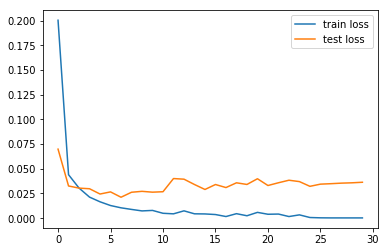

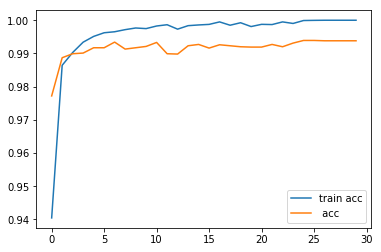

In [3]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.legend(['train acc', ' acc'])

Quite impressive! 0.62% error, even without any form of explicit regularization!

In [4]:
print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

60000/60000 [==============================] - 2s 39us/step
Train error (%):  0.0016666698455765072
10000/10000 [==============================] - 0s 40us/step
Test error (%):  0.6200000000000045


### Understanding what is going on

We can define a function to get the intermediate activations and visualize them.

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [6]:
import keras.backend as K

get_conv_outputs = K.function([model.layers[0].input, K.learning_phase()], [model.layers[0].output, model.layers[2].output])


In [7]:
[conv1, conv2] = get_conv_outputs([x_train[0:2], 0])

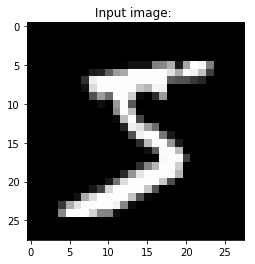

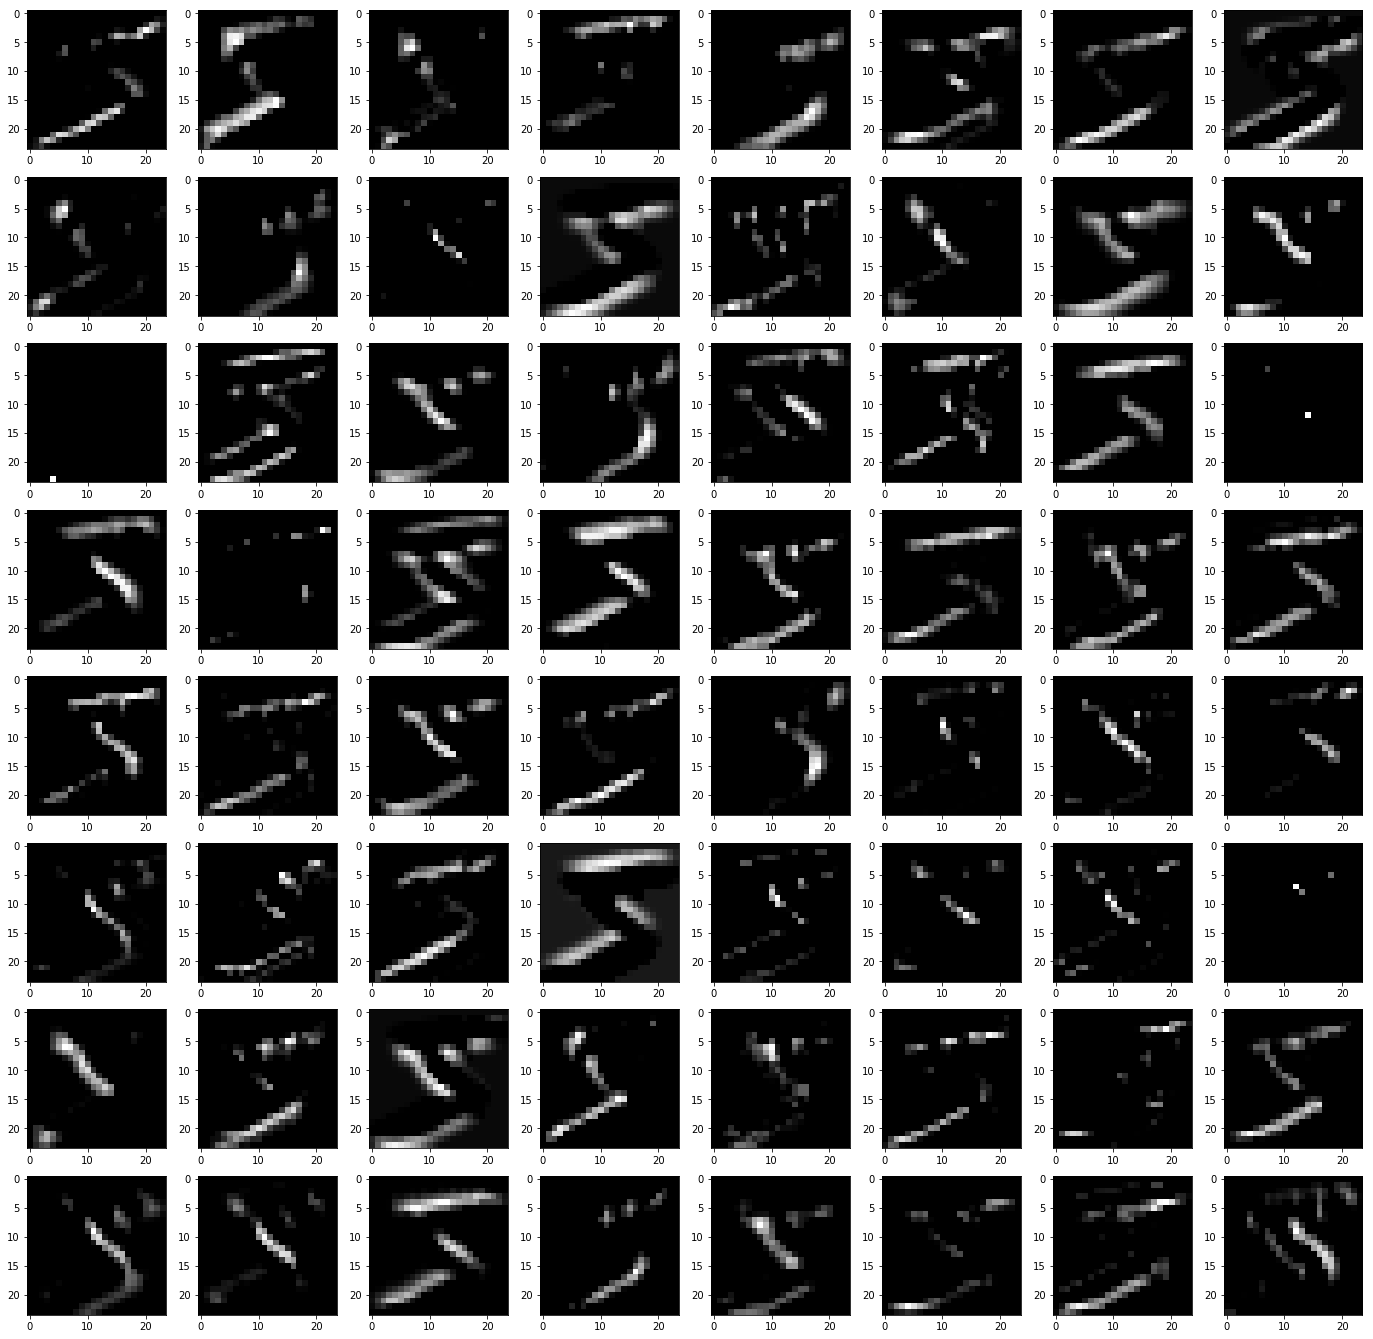

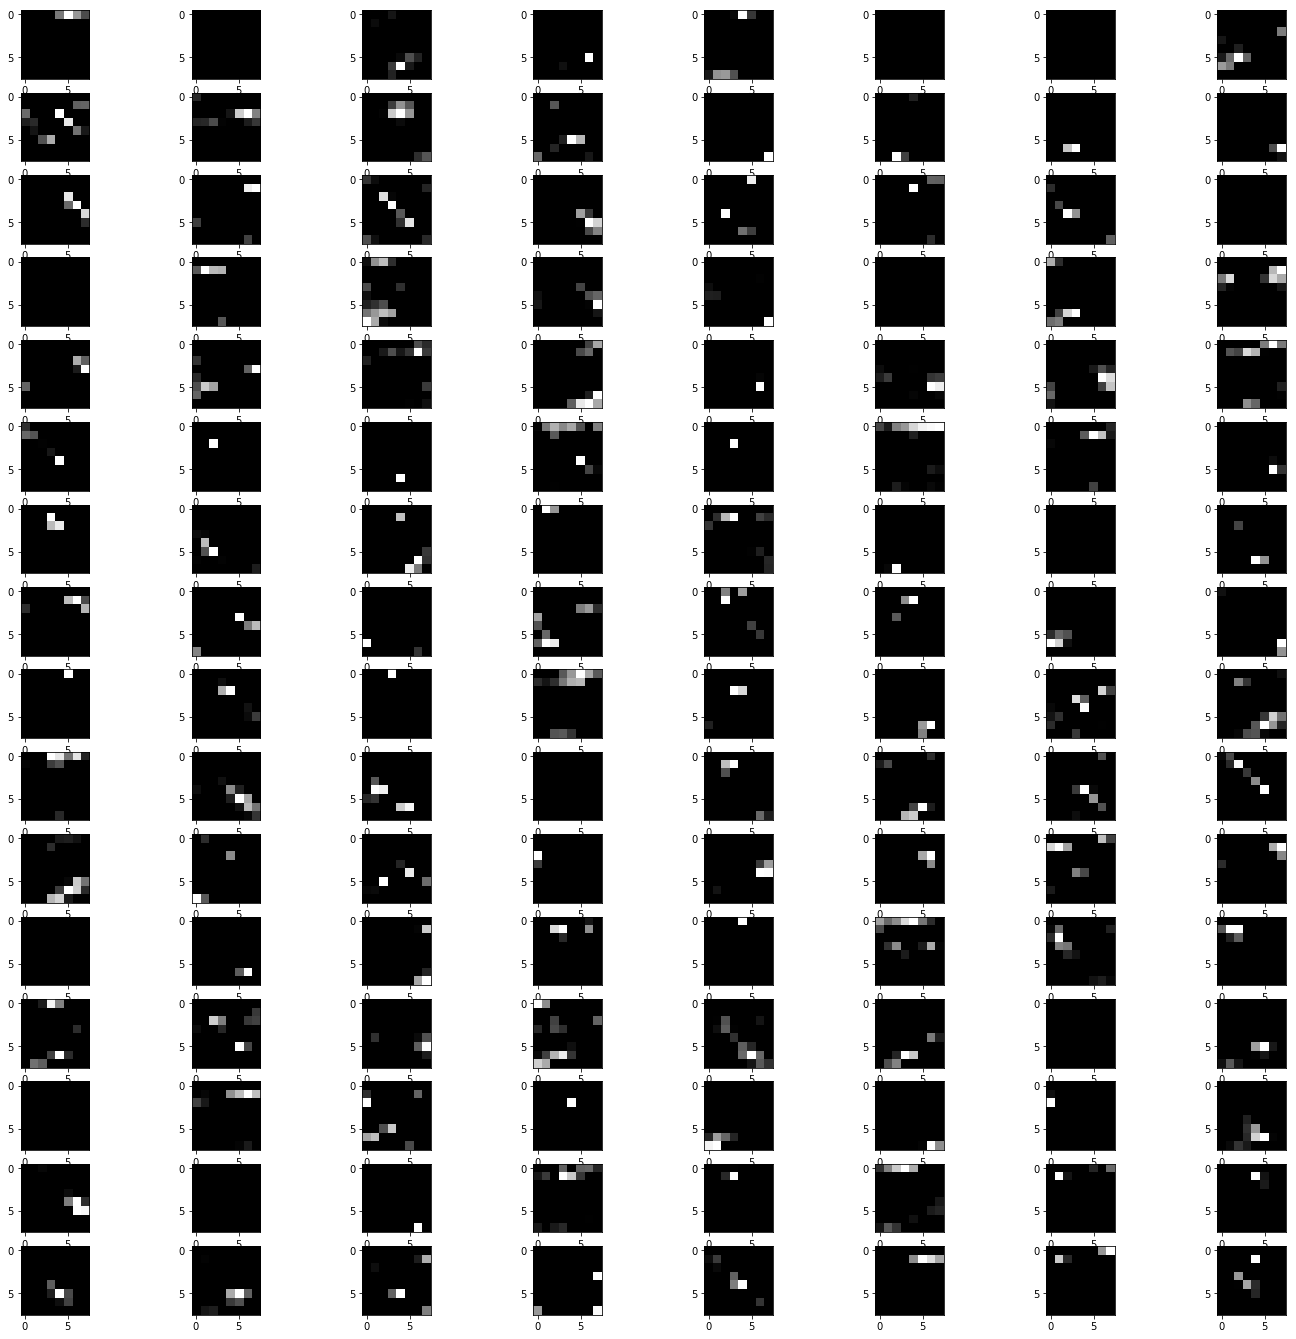

In [8]:
plt.figure()
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title('Input image: ')

plt.figure(figsize=(24, 24))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(conv1[0, :, :, i], cmap='gray')
    
plt.figure(figsize=(24, 24))   
for i in range(128):
    plt.subplot(16, 8, i+1)
    plt.imshow(conv2[0, :, :, i], cmap='gray')    


Let's examine another digit!

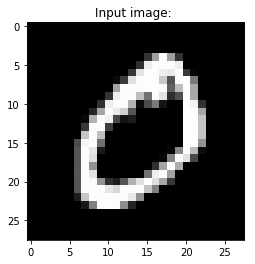

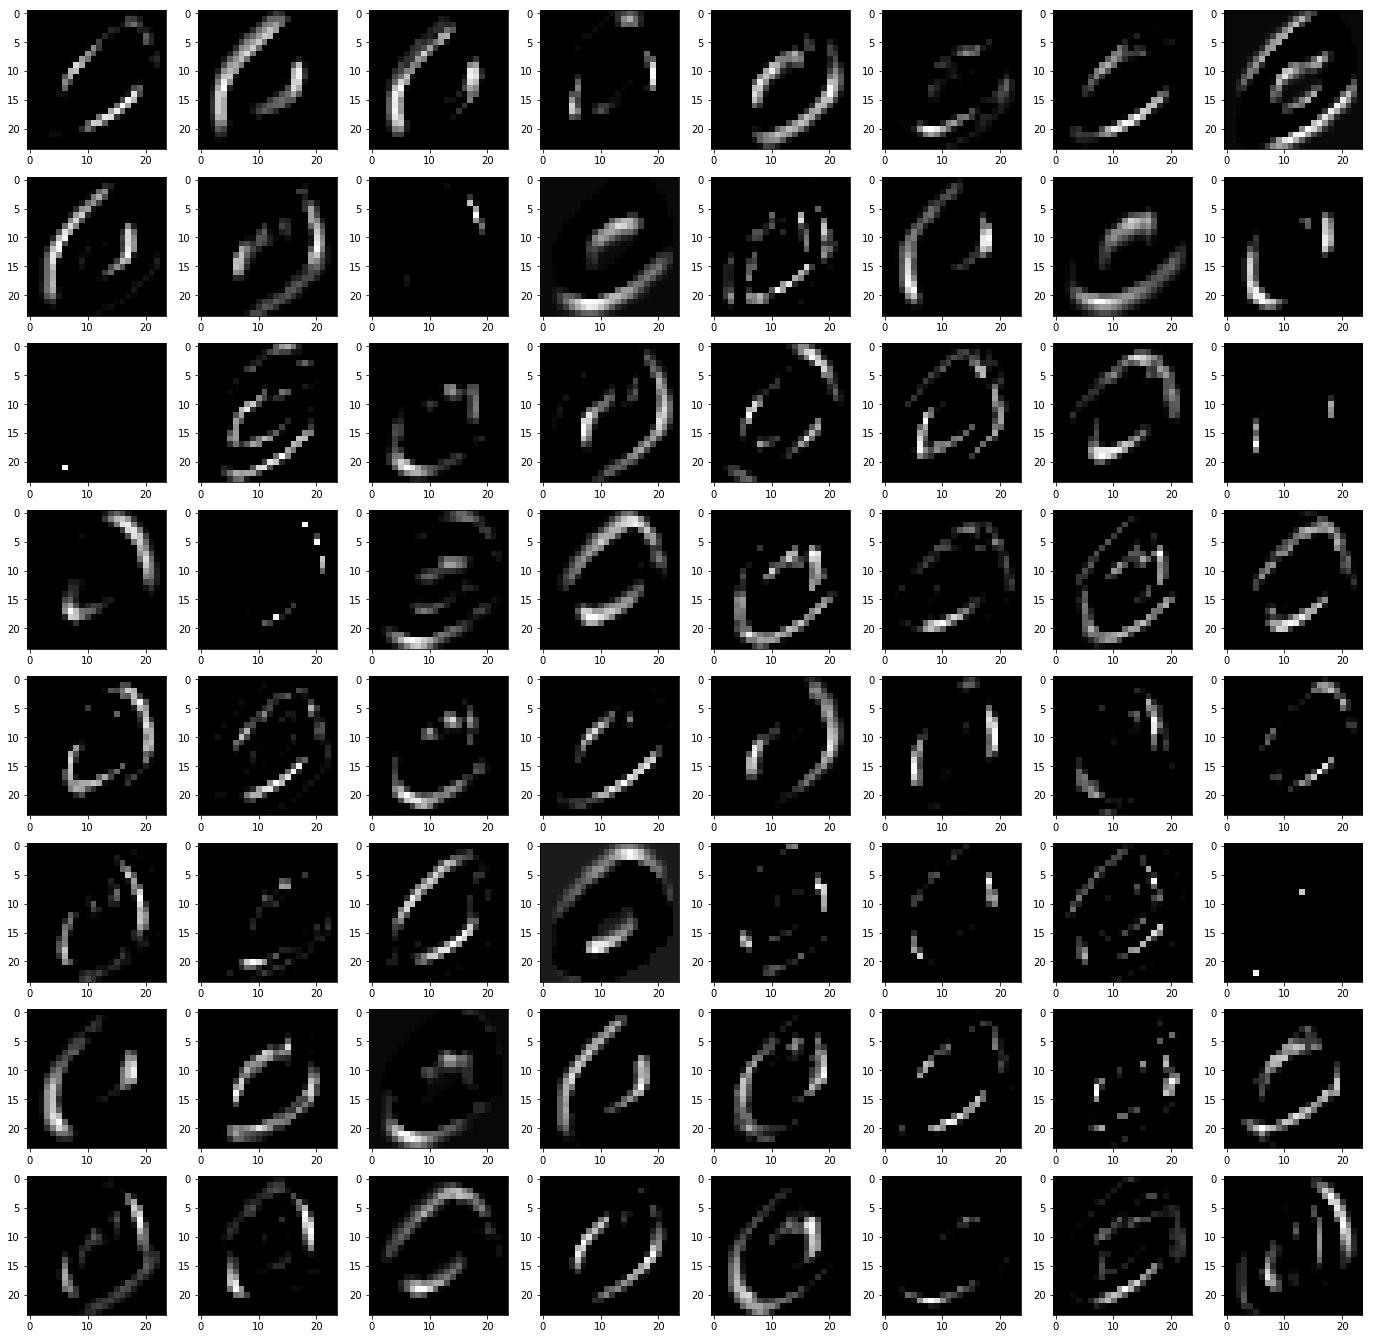

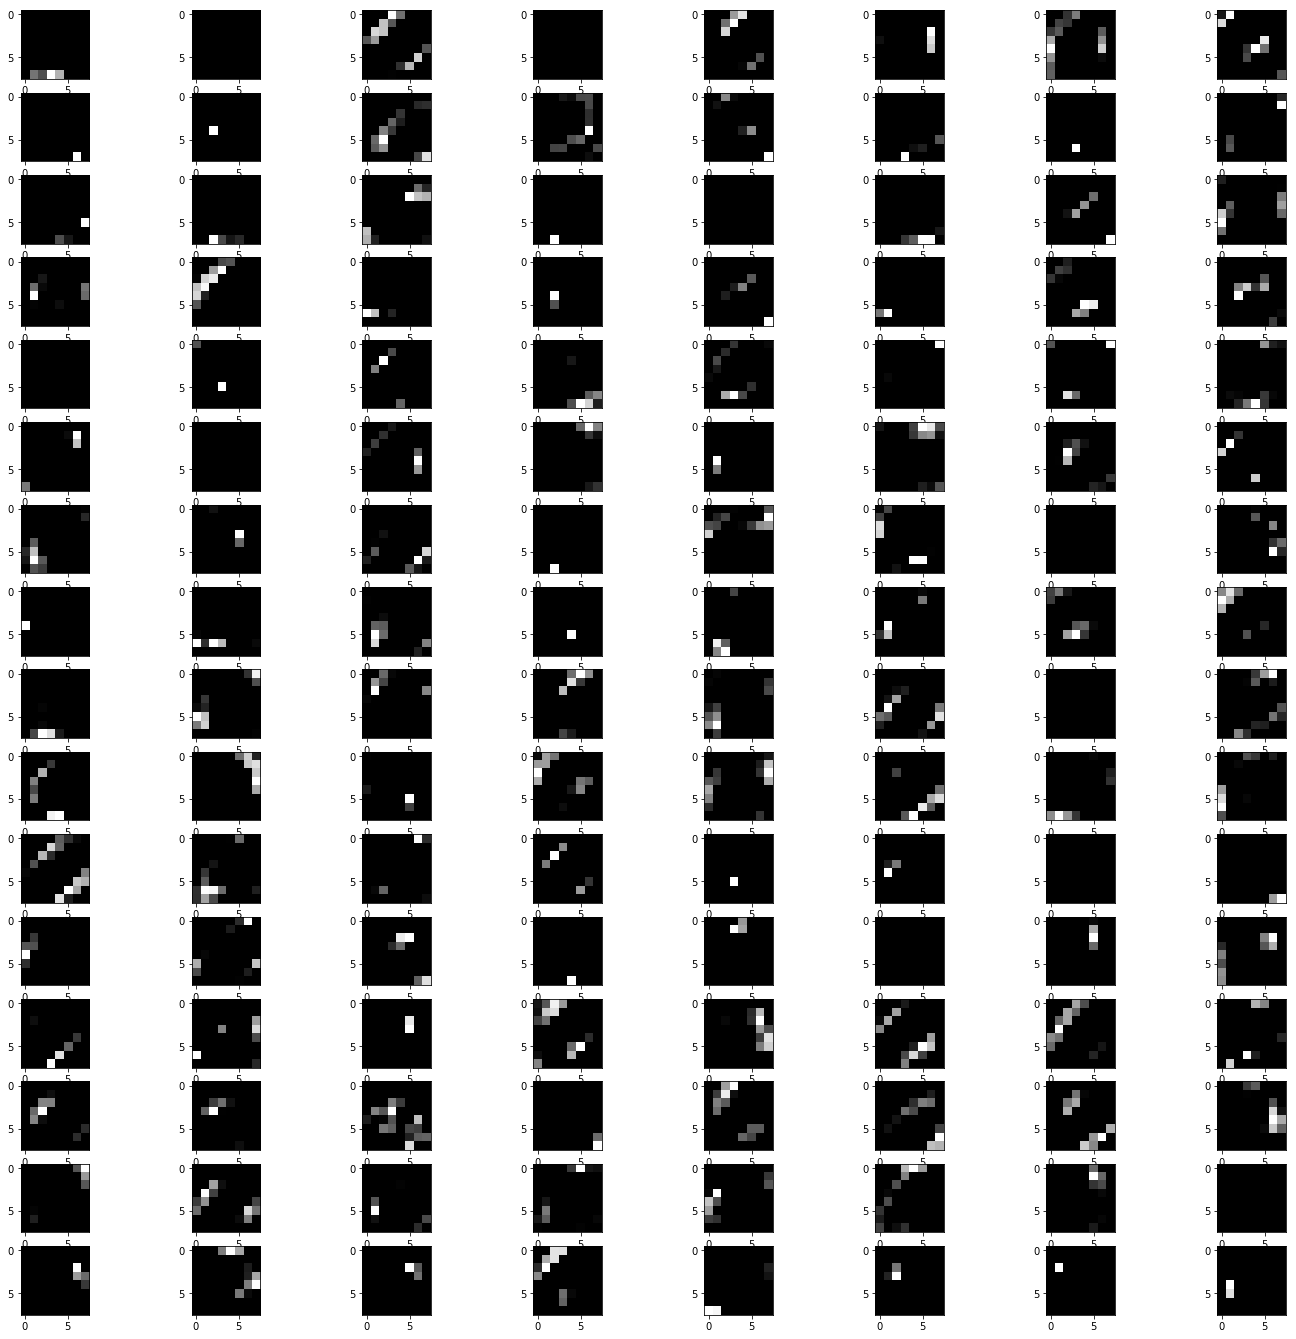

In [9]:
plt.figure()
plt.imshow(x_train[1].reshape(28,28), cmap='gray')
plt.title('Input image: ')

plt.figure(figsize=(24, 24))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(conv1[1, :, :, i], cmap='gray')
    
plt.figure(figsize=(24, 24))   
for i in range(128):
    plt.subplot(16, 8, i+1)
    plt.imshow(conv2[1, :, :, i], cmap='gray')    
